## Data Integration

This notebook highlights the process of integrating data from four different data sources (Excel files) onto a master file. For efficiency, the data manipulation and cleanup is done with Python. After the processing is done, a master Excel file is exported.

Raw data files and table definitions can be found at https://www.kaggle.com/anikannal/solar-power-generation-data

#### Problem Breakdown 
- Customer would like to analize data on power generation from two solar power plants and their respective weather sensor logs. 
- The information recides in four separate Excel workbooks (two power generation files and two weather sensor files.)
- Customer requests: <br>
  -- Consolidate data into one workbook <br>
  -- Manipulate data to facilitate comprehensibility <br>
  ---- Change Codes to easy-to-read labels <br>
  ---- Create Code dictionary for future reference <br>
  -- Conduct basic data cleanup 

Plant 1 Power Generation Data - Sample   (Plant 2 file has the same structure and data formats)

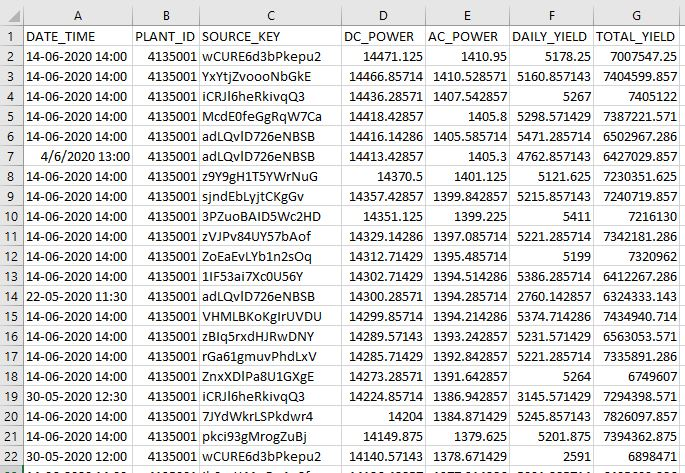

Plant 2 Weather Senson Data (Plant 1 file has the same structure and data formats)

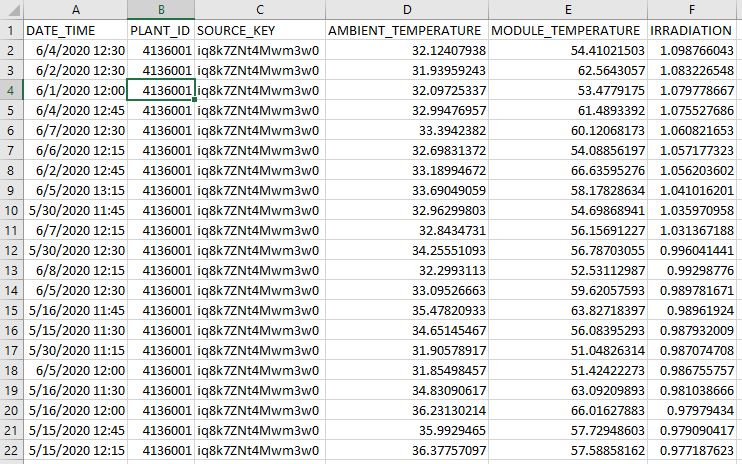

#### WORKFLOW:
##### 1) Load Dependencies


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

##### 2) Import source Excel files

In [2]:
def import_xlx(file):
    '''import excel file into target dataframe'''
    dir = 'D:/Springboard/Projects/SolarPower/data/raw/'
    df = pd.read_excel(dir + file, dtype={'DATE_TIME':np.str}) #import dates as string and manipulate in python
    return df

In [3]:
p1 = import_xlx('Plant_1_Generation_Data.xlsx')
p2 = import_xlx('Plant_2_Generation_Data.xlsx')
w1 = import_xlx('Plant_1_Weather_Sensor_Data.xlsx')
w2 = import_xlx('Plant_2_Weather_Sensor_Data.xlsx')

##### 3) Analyze structure and content of powerplant files

In [4]:
p1.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


Check to see if there are missing values anywhere in the dataset.

In [5]:
p1.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
#check for data type consistency
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


##### 4) Perform data cleanup

Plant ID and Source Key appear to be categorical values. Let's see how many posible values each hold.

In [7]:
print(p1.PLANT_ID.unique())

[4135001]


There is only one ID in this columns. For easier identification lets change the id to '1'.

In [8]:
p1['PLANT_ID'] = '1'
coder = {}
coder[4135001] = 'PLANT ID: 1'

Check data in 'SOURCE_KEY' column.

In [9]:
sources = p1.SOURCE_KEY.unique()
print(sources)
print()
print('There are '+ str(len(p1.SOURCE_KEY.unique())) + ' distinct values.')

['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'ZnxXDlPa8U1GXgE'
 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry' 'iCRJl6heRkivqQ3'
 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV' 'sjndEbLyjtCKgGv'
 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG' 'zBIq5rxdHJRwDNY'
 'zVJPv84UY57bAof' 'YxYtjZvoooNbGkE']

There are 22 distinct values.


There are 22 different values for the source column. These are hard to read. We are going to map this values to something easier to read. Format will be 'P1_SRC_X' for Plant 1 SOURCE #.

We will store the key:value combination for later reference.

In [10]:
#create dictionary to hold source key mapping
p1_source = {}
idx=1
for source in sources:
    p1_source[source] = 'P1_SRC_' + str(idx)
    idx += 1

In [11]:
#replace old codes with new values
p1['SOURCE_KEY'] = p1['SOURCE_KEY'].replace(p1_source)

The DATE_TIME values are been treated as strings. 
Perform data cleanup to standardize format and make the column a DATETIME type.

Separate DATES and TIMES into their own columns for easier manipulation, after clean-up bring back together into DATE_TIME column.
** This is needed because some date entries in the file have inconsistent formats. Removing the time components from them allow python logic to correctly identify and format the dates. 

In [12]:
p1['DATE'] = p1['DATE_TIME'].str.slice(0,10)
p1['TIME'] = p1['DATE_TIME'].str.slice(11,16)

In [13]:
p1.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,1,P1_SRC_1,0.0,0.0,0.0,6259559.0,15-05-2020,00:00
1,15-05-2020 00:00,1,P1_SRC_2,0.0,0.0,0.0,6183645.0,15-05-2020,00:00
2,15-05-2020 00:00,1,P1_SRC_3,0.0,0.0,0.0,6987759.0,15-05-2020,00:00


In [14]:
#Convert the Date column from string to date type
p1['DATE'] = pd.to_datetime(p1['DATE'])
p1.drop('DATE_TIME', axis = 1, inplace=True)

In [15]:
# add seconds for time standardization
p1['TIME'] = p1['TIME'] + ':00'
# convert str to time
p1['TIME'] = pd.to_datetime(p1['TIME'], format= '%H:%M:%S').dt.time
p1['DATE_TIME'] = ''

#Combine date + time into DATE_TIME column
for idx in range (len(p1)):
    p1.iloc[idx,8] = pd.datetime.combine(p1.iloc[idx,6],p1.iloc[idx,7])

# Reorder columns    
p1.drop(['DATE','TIME'], axis=1, inplace=True)
p1 = p1[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']]

<ipython-input-15-588f2891d22f>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  p1.iloc[idx,8] = pd.datetime.combine(p1.iloc[idx,6],p1.iloc[idx,7])


In [16]:
# Vizualize current status of dataset
p1.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
45176,2020-06-06 19:00:00,1,P1_SRC_3,0.000000,0.000000,6496.000000,7158982.000
54772,2020-11-06 08:15:00,1,P1_SRC_8,2913.857143,285.814286,258.428571,6724468.429
35861,2020-02-06 07:00:00,1,P1_SRC_21,1669.857143,163.400000,59.142857,7247825.143
14118,2020-05-22 11:00:00,1,P1_SRC_8,7082.857143,692.971429,2251.142857,6574115.143
38471,2020-03-06 13:00:00,1,P1_SRC_15,11547.428570,1127.485714,4329.142857,7253659.143


Power plant 1 dataset is ready.

### Repeat steps above to process Power plant 2 file.

##### 5) Analyze structure and content

In [17]:
p2.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09


In [18]:
p2.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [19]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


##### 6) Perform data cleanup

In [20]:
print(p2.PLANT_ID.unique())

[4136001]


In [21]:
p2['PLANT_ID'] = '2'
coder[4136001] = 'PLANT ID: 2'

In [22]:
sources = p2.SOURCE_KEY.unique()
print(sources)
print('There are '+ str(len(p2.SOURCE_KEY.unique())) + ' values.')

['4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL' '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4'
 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb' 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv'
 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN' 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX'
 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt' 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV'
 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt' 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb'
 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym']
There are 22 values.


In [23]:
#create dictionary to hold source key mapping
p2_source = {}
idx=1
for source in sources:
    p2_source[source] = 'P2_SRC_' + str(idx)
    idx += 1

In [24]:
p2['SOURCE_KEY'] = p2['SOURCE_KEY'].replace(p2_source)

In [25]:
p2['DATE'] = p2['DATE_TIME'].str.slice(0,10)
p2['TIME'] = p2['DATE_TIME'].str.slice(11,16)

In [26]:
p2['DATE'] = pd.to_datetime(p2['DATE'])
p2.drop('DATE_TIME', axis = 1, inplace=True)

In [27]:
p2['TIME'] = p2['TIME'] + ':00'
p2['TIME'] = pd.to_datetime(p2['TIME'], format= '%H:%M:%S').dt.time
p2['DATE_TIME'] = ''
for idx in range (len(p2)):
    p2.iloc[idx,8] = pd.datetime.combine(p2.iloc[idx,6],p2.iloc[idx,7])

p2.drop(['DATE','TIME'], axis=1, inplace=True)
p2 = p2[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']]

<ipython-input-27-4fbbd9230d85>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  p2.iloc[idx,8] = pd.datetime.combine(p2.iloc[idx,6],p2.iloc[idx,7])


In [28]:
p2.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
47837,2020-06-08 14:15:00,2,P2_SRC_6,0.000000,0.000000,1330.000000,1.795072e+09
32534,2020-06-01 07:45:00,2,P2_SRC_15,202.053333,198.093333,222.666667,5.937129e+08
24500,2020-05-28 06:00:00,2,P2_SRC_20,15.120000,14.593333,1.266667,2.305880e+06
61875,2020-06-15 05:45:00,2,P2_SRC_8,0.000000,0.000000,0.000000,2.670741e+06
14387,2020-05-22 09:45:00,2,P2_SRC_2,0.000000,0.000000,1605.000000,1.215316e+09


### Both Power Plant Generation files are ready.

--

### Process Weather Sensor files

##### 6) Analyze structure and content

In [29]:
w1.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


In [30]:
w1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


##### 7) Perform data cleanup

Code for readeability

In [31]:
w1.PLANT_ID.unique()

array([4135001], dtype=int64)

In [32]:
w1['PLANT_ID'] = '1'

In [33]:
w1['SOURCE_KEY'].unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [34]:
w1['SOURCE_KEY'] = 'WXS1'
coder['HmiyD2TTLFNqkNe'] = 'WXS1'

Process Data/Time data

In [35]:
w1['DATE'] = w1['DATE_TIME'].str.slice(0,10)
w1['DATE'] = pd.to_datetime(w1['DATE'])
w1['TIME'] = w1['DATE_TIME'].str.slice(11,16)
w1['TIME'] = w1['TIME'] + ':00'
w1['TIME'] = pd.to_datetime(w1['TIME'], format= '%H:%M:%S').dt.time
w1.drop('DATE_TIME', axis=1, inplace=True)
w1['DATE_TIME'] = ''

In [36]:
for idx in range (len(w1)):
    w1.iloc[idx,7] = pd.datetime.combine(w1.iloc[idx,5],w1.iloc[idx,6])
w1.drop(['DATE','TIME'], axis=1, inplace=True)
w1= w1[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
w1.head(3)

<ipython-input-36-f041425cb444>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  w1.iloc[idx,7] = pd.datetime.combine(w1.iloc[idx,5],w1.iloc[idx,6])


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1,WXS1,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,1,WXS1,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,1,WXS1,24.935753,22.592306,0.0


#### Work second weather file

##### 8) Analyze structure and content

In [37]:
w2.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0


In [38]:
w2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


##### 9) Perform data cleanup

Code for redeability

In [39]:
w2.PLANT_ID.unique()

array([4136001], dtype=int64)

In [40]:
w2.SOURCE_KEY.unique()

array(['iq8k7ZNt4Mwm3w0'], dtype=object)

In [41]:
w2['PLANT_ID'] = '2'
w2['SOURCE_KEY'] = 'WXS2'
coder['iq8k7ZNt4Mwm3w0'] = 'WXS2'

Process Date/Time data

In [42]:
w2['DATE'] = w2['DATE_TIME'].str.slice(0,10)
w2['DATE'] = pd.to_datetime(w2['DATE'])
w2['TIME'] = w2['DATE_TIME'].str.slice(11,16)
w2['TIME'] = w2['TIME'] + ':00'
w2['TIME'] = pd.to_datetime(w2['TIME'], format= '%H:%M:%S').dt.time
w2.drop('DATE_TIME', axis=1, inplace=True)
w2['DATE_TIME'] = ''

In [43]:
for idx in range (len(w2)):
    w2.iloc[idx,7] = pd.datetime.combine(w2.iloc[idx,5], w2.iloc[idx,6])
w2.drop(['DATE','TIME'], axis=1, inplace=True)
w2= w2[['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
w2.head(3)

<ipython-input-43-399aca825677>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  w2.iloc[idx,7] = pd.datetime.combine(w2.iloc[idx,5], w2.iloc[idx,6])


,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,2,WXS2,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,2,WXS2,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,2,WXS2,26.682055,24.427290,0.0


### Merge datasets into Master File

##### 10) Prepare dataset for merge

In [44]:
# join powerplant datasets
df_power = pd.concat([p1,p2], ignore_index=True)
# join wx sensor datasets
df_wx = pd.concat([w1,w2], ignore_index=True)

In [45]:
# rename commun column name to avoid conflict
df_power.rename(columns={'SOURCE_KEY':'PLANT_SOURCE'}, inplace=True)

In [46]:
# rename columns for redeability
df_wx.rename(columns={'SOURCE_KEY':'WX_SENSOR', 'AMBIENT_TEMPERATURE': 'AMBIENT_TEMP', 'MODULE_TEMPERATURE':'MODULE_TEMP'}, inplace=True)

##### 11) Merge Datasets

In [47]:
df = pd.merge(df_power, df_wx, how='left', left_on=['DATE_TIME', 'PLANT_ID'], right_on=['DATE_TIME', 'PLANT_ID'])

##### 12) Conduct final cleanup on Master File

##### Limit Temperature and Irradiation values level of precision (rounding.)

In [48]:
df['AMBIENT_TEMP'] = round(df['AMBIENT_TEMP'],4)
df['MODULE_TEMP'] = round(df['MODULE_TEMP'],4)
df['IRRADIATION'] = round(df['IRRADIATION'],6)
df['DC_POWER'] = round(df['DC_POWER'],4)
df['AC_POWER'] = round(df['AC_POWER'],4)
df['DAILY_YIELD'] = round(df['DAILY_YIELD'],4)
df['TOTAL_YIELD'] = round(df['TOTAL_YIELD'],4)
df

,DATE_TIME,PLANT_ID,PLANT_SOURCE,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,WX_SENSOR,AMBIENT_TEMP,MODULE_TEMP,IRRADIATION
0,2020-05-15 00:00:00,1,P1_SRC_1,0.0,0.0,0.0,6259559.0,WXS1,25.1843,22.8575,0.0
1,2020-05-15 00:00:00,1,P1_SRC_2,0.0,0.0,0.0,6183645.0,WXS1,25.1843,22.8575,0.0
2,2020-05-15 00:00:00,1,P1_SRC_3,0.0,0.0,0.0,6987759.0,WXS1,25.1843,22.8575,0.0
3,2020-05-15 00:00:00,1,P1_SRC_4,0.0,0.0,0.0,7602960.0,WXS1,25.1843,22.8575,0.0
4,2020-05-15 00:00:00,1,P1_SRC_5,0.0,0.0,0.0,7158964.0,WXS1,25.1843,22.8575,0.0
...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,2,P2_SRC_18,0.0,0.0,4157.0,520758.0,WXS2,23.2029,22.5359,0.0
136472,2020-06-17 23:45:00,2,P2_SRC_19,0.0,0.0,3931.0,121131356.0,WXS2,23.2029,22.5359,0.0
136473,2020-06-17 23:45:00,2,P2_SRC_20,0.0,0.0,4322.0,2427691.0,WXS2,23.2029,22.5359,0.0
136474,2020-06-17 23:45:00,2,P2_SRC_21,0.0,0.0,4218.0,106896394.0,WXS2,23.2029,22.5359,0.0


### Export Master FIle

13) Create Lookup table of New and old codes for export

In [49]:
code = {**p1_source, **p2_source}
code = {**code, **coder}

In [50]:
code_df = pd.DataFrame.from_dict(code, orient='index', columns=['New_Code'])
code_df['Old_Code'] = code_df.index
code_df.reset_index(drop=True, inplace=True)
code_df.head()

,New_Code,Old_Code
0,P1_SRC_1,1BY6WEcLGh8j5v7
1,P1_SRC_2,1IF53ai7Xc0U56Y
2,P1_SRC_3,3PZuoBAID5Wc2HD
3,P1_SRC_4,7JYdWkrLSPkdwr4
4,P1_SRC_5,McdE0feGgRqW7Ca


14) Export merged master file to Excel Workbook

In [51]:
file = 'D:/Springboard/Projects/SolarPower/data/final/Combined_Power_Generation.xlsx'
with pd.ExcelWriter(file, engine='openpyxl') as writer:  
    df.to_excel(writer, sheet_name='Master')
    code_df.to_excel(writer, sheet_name='Code_Lookup')

### Final Master File

Master worksheet

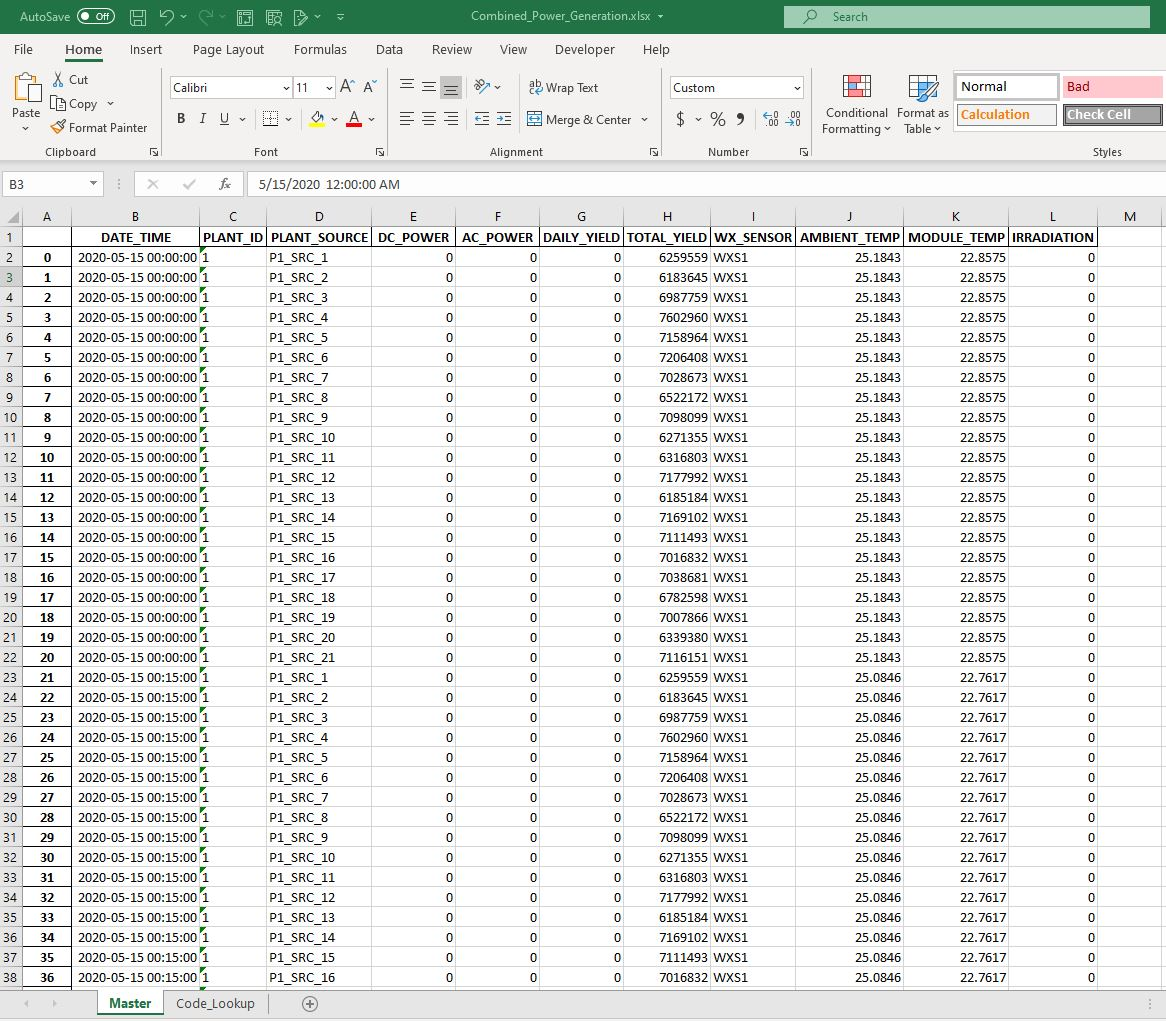

Code Lookup Worksheet

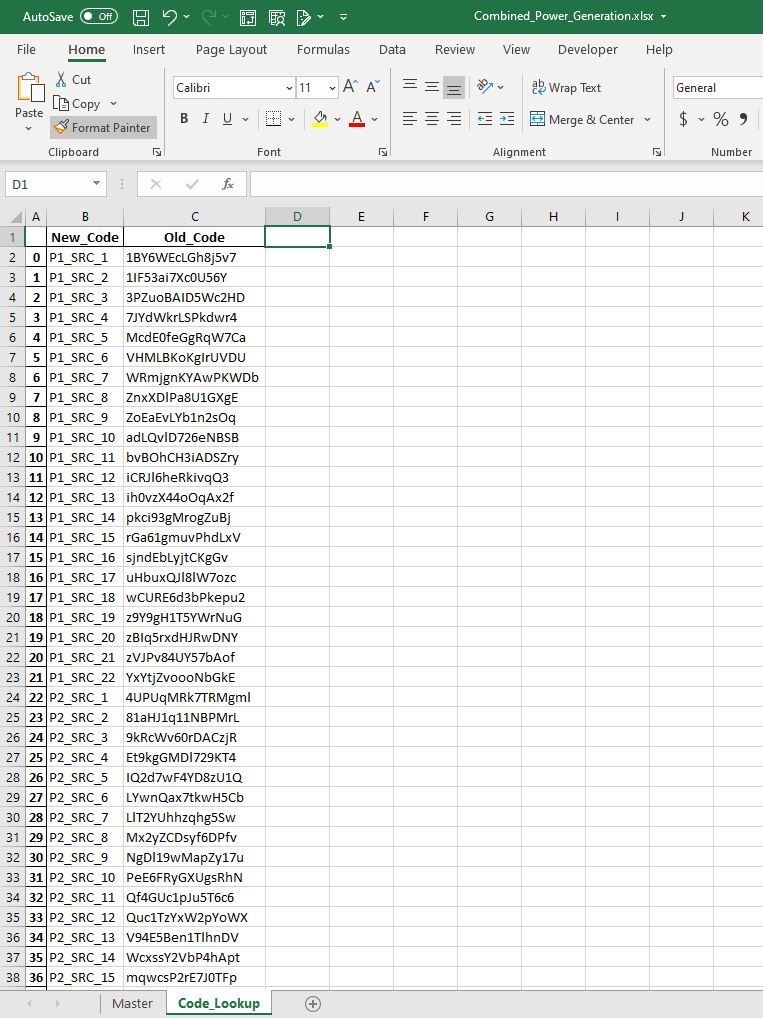